<a href="https://colab.research.google.com/github/maggie8801/Jourdeness/blob/main/%E7%AF%84%E4%BE%8B%E6%9C%83%E5%93%A1%E6%8C%91%E9%81%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
pd.set_option('display.float_format', lambda x:'%.2f'% x) #如果pandas讀到float型態的資料會顯示到小數點第二位

In [2]:
data = pd.read_csv("/content/drive/MyDrive/Jourdeness/ltv_rfm_with_clustring.csv")
data

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,CLV,CustomerID,frequency,recency,T,monetary_value,frequency_holdout,...,predict_purch_90,prob_alive,CLVCluster,clv_Segment,R,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,rfm_Segment
0,0,0,0,9757.45,9100000000060,6.00,527.00,642.00,3094.67,0.00,...,0.82,0.93,0,Low,115.00,2,0,1,3,Mid-Value
1,1,2,3,13199.08,9100000000114,7.00,540.00,643.00,3666.00,2.00,...,0.94,0.94,0,Low,103.00,2,0,1,3,Mid-Value
2,2,6,9,9442.04,9100000000268,3.00,542.00,542.00,4353.33,1.00,...,0.57,0.96,0,Low,0.00,2,0,1,3,Mid-Value
3,3,12,17,12131.85,9100000000428,6.00,590.00,632.00,3661.17,4.00,...,0.87,0.97,0,Low,42.00,2,0,1,3,Mid-Value
4,4,36,61,14634.88,9100000001845,6.00,564.00,577.00,4059.83,1.00,...,0.95,0.97,0,Low,13.00,2,0,1,3,Mid-Value
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42877,42877,10159,18037,3.79,9100000929804,27.00,418.00,732.00,1714.70,1.00,...,0.00,0.00,0,Low,314.00,1,2,0,3,Mid-Value
42878,42878,23958,41915,0.47,9100002199830,45.00,474.00,723.00,2290.29,0.00,...,0.00,0.00,0,Low,249.00,1,2,0,3,Mid-Value
42879,42879,25656,44869,154.65,9100002357810,32.00,508.00,727.00,1872.19,5.00,...,0.02,0.01,0,Low,219.00,1,2,0,3,Mid-Value
42880,42880,27272,47550,1147.02,9100002481065,41.00,577.00,730.00,1650.02,2.00,...,0.18,0.04,0,Low,153.00,1,2,0,3,Mid-Value


In [3]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'CLV', 'CustomerID',
       'frequency', 'recency', 'T', 'monetary_value', 'frequency_holdout',
       'monetary_value_holdout', 'duration_holdout', 'predict_purch_10',
       'predict_purch_30', 'predict_purch_60', 'predict_purch_90',
       'prob_alive', 'CLVCluster', 'clv_Segment', 'R', 'RecencyCluster',
       'FrequencyCluster', 'RevenueCluster', 'OverallScore', 'rfm_Segment'],
      dtype='object')

In [4]:
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

In [5]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3)
kmeans.fit(data[['prob_alive']])
data['aliveCluster'] = kmeans.predict(data[['prob_alive']])

data = order_cluster('aliveCluster', 'prob_alive', data, True)

data.groupby('aliveCluster')['prob_alive'].describe()

,count,mean,std,min,25%,50%,75%,max
aliveCluster,,,,,,,,
0,6695.00,0.17,0.11,0.00,0.08,0.16,0.27,0.39
1,7928.00,0.61,0.11,0.39,0.52,0.62,0.70,0.77
2,28259.00,0.93,0.06,0.77,0.89,0.95,0.98,1.00


In [6]:
data['T-R'] = data['T']-data['recency']
data.drop(["Unnamed: 0", "Unnamed: 0.1", "Unnamed: 0.1.1", "frequency_holdout", "monetary_value_holdout", "duration_holdout", "recency", "T"], axis=1, inplace=True)
#data[["frequency", "T-R", "monetary_value", "prob_alive"]].describe().T
data

,CLV,CustomerID,frequency,monetary_value,predict_purch_10,predict_purch_30,predict_purch_60,predict_purch_90,prob_alive,CLVCluster,clv_Segment,R,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,rfm_Segment,aliveCluster,T-R
0,9757.45,9100000000060,6.00,3094.67,0.09,0.28,0.55,0.82,0.93,0,Low,115.00,2,0,1,3,Mid-Value,2,115.00
1,13199.08,9100000000114,7.00,3666.00,0.11,0.32,0.63,0.94,0.94,0,Low,103.00,2,0,1,3,Mid-Value,2,103.00
2,9442.04,9100000000268,3.00,4353.33,0.06,0.19,0.38,0.57,0.96,0,Low,0.00,2,0,1,3,Mid-Value,2,0.00
3,12131.85,9100000000428,6.00,3661.17,0.10,0.29,0.58,0.87,0.97,0,Low,42.00,2,0,1,3,Mid-Value,2,42.00
4,14634.88,9100000001845,6.00,4059.83,0.11,0.32,0.63,0.95,0.97,0,Low,13.00,2,0,1,3,Mid-Value,2,13.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42877,3.79,9100000929804,27.00,1714.70,0.00,0.00,0.00,0.00,0.00,0,Low,314.00,1,2,0,3,Mid-Value,0,314.00
42878,0.47,9100002199830,45.00,2290.29,0.00,0.00,0.00,0.00,0.00,0,Low,249.00,1,2,0,3,Mid-Value,0,249.00
42879,154.65,9100002357810,32.00,1872.19,0.00,0.01,0.01,0.02,0.01,0,Low,219.00,1,2,0,3,Mid-Value,0,219.00
42880,1147.02,9100002481065,41.00,1650.02,0.02,0.06,0.12,0.18,0.04,0,Low,153.00,1,2,0,3,Mid-Value,0,153.00


In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLV,42882.00,14329.19,19339.54,0.07,2235.34,7740.00,18684.90,314573.27
CustomerID,42882.00,9100001475794.55,922187.35,9100000000060.00,9100000588998.00,9100001436485.50,9100002375103.50,9100003171279.00
frequency,42882.00,7.75,8.75,1.00,2.00,5.00,10.00,133.00
monetary_value,42882.00,3103.97,1992.11,1.00,1489.00,2835.30,4338.00,9074.50
predict_purch_10,42882.00,0.12,0.12,0.00,0.04,0.08,0.16,1.66
predict_purch_30,42882.00,0.35,0.35,0.00,0.11,0.25,0.48,4.98
predict_purch_60,42882.00,0.70,0.71,0.00,0.21,0.49,0.95,9.94
predict_purch_90,42882.00,1.04,1.06,0.00,0.31,0.73,1.43,14.87
prob_alive,42882.00,0.75,0.29,0.00,0.62,0.89,0.96,1.00
CLVCluster,42882.00,0.22,0.46,0.00,0.00,0.00,0.00,2.00


In [9]:
data['clv_Segment'].value_counts()

Low     34200
Mid      7878
High      804
Name: clv_Segment, dtype: int64

In [10]:
df_clvseg = data['clv_Segment'].value_counts()
df_clvseg1 = df_clvseg.reset_index(inplace=False)
df_clvseg1.columns = ['Segment','Number']
df_clvseg1

,Segment,Number
0,Low,34200
1,Mid,7878
2,High,804


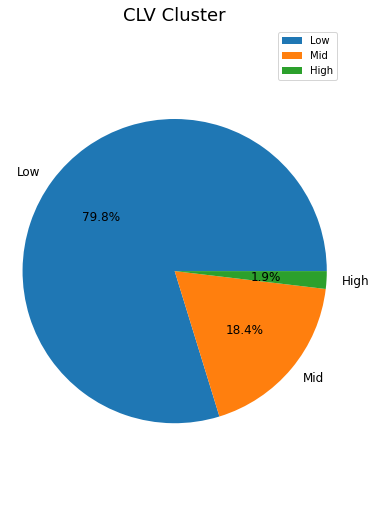

In [14]:
plt.figure(figsize=(6,9))    # 顯示圖框架大小

labels = df_clvseg1["Segment"]      # 製作圓餅圖的類別標籤
separeted = (0, 0, 0.3, 0, 0.3)  # 依據類別數量，分別設定要突出的區塊
size = df_clvseg1["Number"]          # 製作圓餅圖的數值來源

plt.pie(size,              # 數值
        labels = labels,    # 標籤
        autopct = "%1.1f%%",  # 將數值百分比並留到小數點一位
        pctdistance = 0.6,   # 數字距圓心的距離
        textprops = {"fontsize" : 12})  # 文字大小


 
plt.axis('equal')             # 使圓餅圖比例相等
plt.title("CLV Cluster", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best")             # 設定圖例及其位置為最佳

plt.savefig("Pie chart of car accident.jpg",   # 儲存圖檔
            bbox_inches='tight',     # 去除座標軸占用的空間
            pad_inches=0.0)        # 去除所有白邊

In [15]:
data.groupby('RecencyCluster')['R'].describe()

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,5488.00,517.53,91.74,383.00,437.00,501.00,586.00,730.00
1,11455.00,247.39,71.13,151.00,183.00,238.00,308.00,382.00
2,25939.00,53.90,44.87,0.00,13.00,45.00,85.00,150.00


In [16]:
data.groupby('FrequencyCluster')['frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,31349.00,3.68,2.45,1.00,2.00,3.00,5.00,9.00
1,9486.00,15.13,4.33,10.00,11.00,14.00,18.00,25.00
2,2047.00,36.02,10.95,26.00,28.00,33.00,40.00,133.00


In [17]:
data.groupby('RevenueCluster')['monetary_value'].describe()

,count,mean,std,min,25%,50%,75%,max
RevenueCluster,,,,,,,,
0,18405.00,1313.57,666.92,1.00,754.50,1276.92,1900.20,2467.80
1,17263.00,3609.98,721.30,2468.00,2984.68,3547.96,4196.50,5042.90
2,7214.00,6460.96,1072.16,5043.50,5555.03,6221.41,7197.00,9074.50


In [18]:
data['OverallScore'].value_counts()

2    11323
3     9856
4     7923
1     6812
0     3508
5     2874
6      586
Name: OverallScore, dtype: int64

In [19]:
data['rfm_Segment'].value_counts()

Low-Value     21643
Mid-Value     17779
High-Value     3460
Name: rfm_Segment, dtype: int64

In [20]:
df_rfmseg = data['rfm_Segment'].value_counts()
df_rfmseg1 = df_rfmseg.reset_index(inplace=False)
df_rfmseg1.columns = ['Segment','Number']
df_rfmseg1

,Segment,Number
0,Low-Value,21643
1,Mid-Value,17779
2,High-Value,3460


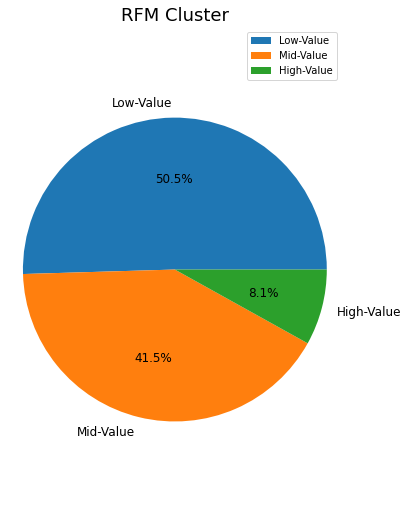

In [22]:
plt.figure(figsize=(6,9))    # 顯示圖框架大小

labels = df_rfmseg1["Segment"]      # 製作圓餅圖的類別標籤
separeted = (0, 0, 0.3, 0, 0.3)  # 依據類別數量，分別設定要突出的區塊
size = df_rfmseg1["Number"]          # 製作圓餅圖的數值來源

plt.pie(size,              # 數值
        labels = labels,    # 標籤
        autopct = "%1.1f%%",  # 將數值百分比並留到小數點一位
        pctdistance = 0.6,   # 數字距圓心的距離
        textprops = {"fontsize" : 12})  # 文字大小


 
plt.axis('equal')             # 使圓餅圖比例相等
plt.title("RFM Cluster", {"fontsize" : 18})  # 設定標題及其文字大小
plt.legend(loc = "best")             # 設定圖例及其位置為最佳

plt.savefig("Pie chart of car accident.jpg",   # 儲存圖檔
            bbox_inches='tight',     # 去除座標軸占用的空間
            pad_inches=0.0)        # 去除所有白邊

In [23]:
#就決定是你了
data.loc[(data['CLVCluster']==2) & (data['RecencyCluster']==2) & (data['FrequencyCluster']==0) & (data['RevenueCluster']==2) & (data['aliveCluster']==1)]
#中高
#高R低F高M
#重要發展客戶
#最近一次消費時間較近、消費金額高，但頻率不高、忠誠度不高的潛力客戶。企業必須嚴格檢視每一次服務體驗，是否讓客戶非常滿意。

,CLV,CustomerID,frequency,monetary_value,predict_purch_10,predict_purch_30,predict_purch_60,predict_purch_90,prob_alive,CLVCluster,clv_Segment,R,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,rfm_Segment,aliveCluster,T-R
30894,88271.19,9100002949275,7.00,7850.71,0.36,1.06,2.10,3.11,0.76,2,High,50.00,2,0,2,4,Mid-Value,1,50.00


In [24]:
data.loc[(data['CLVCluster']==1) & (data['RecencyCluster']==1) & (data['FrequencyCluster']==2) & (data['RevenueCluster']==2)]
#高中
#低R高F高M
#重要保持客戶
#最近一次的消費時間離現在較久，但消費頻率和金額都很高的客戶，企業要主動介紹新趨勢等資訊，和他們保持聯繫。
#過去的業績大部分來自這群顧客，但他們已許久未進行消費。爲什麽他們最近不關心你了？他們曾經是很有價值的顧客，因此應瞭解他們目前的需求。建議發送舊顧客關心信，提供促銷活動，並調查他們爲何近期不再關注公司。

,CLV,CustomerID,frequency,monetary_value,predict_purch_10,predict_purch_30,predict_purch_60,predict_purch_90,prob_alive,CLVCluster,clv_Segment,R,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,rfm_Segment,aliveCluster,T-R
39023,28117.77,9100001113370,27.00,8348.41,0.10,0.30,0.59,0.89,0.28,1,Mid,156.00,1,2,2,5,High-Value,0,156.00


In [25]:
data.loc[(data['CLVCluster']==0) & (data['RecencyCluster']==2) & (data['FrequencyCluster']==2) & (data['RevenueCluster']==2)]
#高低
#高R(126)高M高F
#過去RFM價值都非常高的人，在經過CLV預測後，發現他未來的價值降低，此時，就能進一步留存（Retain）該位用戶

,CLV,CustomerID,frequency,monetary_value,predict_purch_10,predict_purch_30,predict_purch_60,predict_purch_90,prob_alive,CLVCluster,clv_Segment,R,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,rfm_Segment,aliveCluster,T-R
39013,19769.67,9100000304823,43.00,8515.05,0.07,0.21,0.41,0.61,0.12,0,Low,126.00,2,2,2,6,High-Value,0,126.00


In [26]:
data.loc[(data['CLVCluster']==1) & (data['RecencyCluster']==2) & (data['FrequencyCluster']==2) & (data['RevenueCluster']==0) & (data['aliveCluster']==1) & (data['monetary_value']<2300)]
#中中
#高R高F低M
#一位用戶未來的價值很高，但從RFM來看，卻發現他RF高、M較低，這時，也能對他進行向上銷售

,CLV,CustomerID,frequency,monetary_value,predict_purch_10,predict_purch_30,predict_purch_60,predict_purch_90,prob_alive,CLVCluster,clv_Segment,R,RecencyCluster,FrequencyCluster,RevenueCluster,OverallScore,rfm_Segment,aliveCluster,T-R
36186,27735.01,9100000949741,43.00,2093.77,0.39,1.16,2.32,3.47,0.70,1,Mid,83.00,2,2,0,4,Mid-Value,1,83.00
